<a href="https://colab.research.google.com/github/cinnaavox/TravelTide-Project/blob/main/Feature_Engineering_and_Segmentation_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠️ 1. Feature Engineering – Zielsetzung

In dieser Woche konzentriere ich mich auf Feature Engineering, also das Erstellen neuer Merkmale, die mir helfen sollen, Kunden von TravelTide besser zu beschreiben und später in sinnvolle Segmente einzuteilen.
Das Ziel ist es, eine User Base Tabelle auf Nutzer-Ebene zu erstellen. Diese Tabelle dient als Grundlage für die spätere Segmentierung, bei der wir passende Perks (Vorteile) für unterschiedliche Reisetypen vorschlagen wollen.

Warum Feature Engineering?

* Rohdaten wie Sessions oder Buchungen sind noch zu detailliert.

* Durch Aggregationen und neue Features kann ich Verhalten, Vorlieben und Muster der Reisenden sichtbar machen.

* Diese Features sollen dabei helfen, Persönlichkeiten bzw. Personas abzuleiten – z. B. Vielbucher, Familienreisende, oder Discount-orientierte Kunden.

Meine Arbeitsschritte für diese Woche:

1. Vorhandene Sessions und User-Daten kombinieren.

2. Sinnvolle Features aus den Rohdaten ableiten (z. B. Ausgaben, Anzahl Trips, Dauer von Reisen).

3. Eigene Ideen für neue Features hinzufügen, die für die Rewards-Perks besonders interessant sind.

4. Die Daten auf User-Level aggregieren und als neue Tabelle speichern (user_base.csv).

## 📥 2. Daten einlesen & Überblick

In [ ]:
import pandas as pd

# Pfad zur CSV anpassen – hier nehmen wir die Week 2 Basis
CSV_PATH = "session_base_new.csv"

# CSV einlesen und relevante Datums-Spalten gleich als datetime parsen
parse_these = [
    "session_start", "session_end", "sign_up_date",
    "check_in_time", "check_out_time",
    "departure_time", "return_time"
]

df = pd.read_csv(CSV_PATH, parse_dates=parse_these, low_memory=False)

# Überblick über Form und Spalten
print("Shape:", df.shape)
print("\nSpaltenübersicht:\n", df.columns.tolist())

# Erste Zeilen anzeigen
df.head()

Shape: (49211, 41)

Spaltenübersicht:
 ['session_id', 'user_id', 'trip_id', 'session_start', 'session_end', 'page_clicks', 'flight_discount', 'flight_discount_amount', 'hotel_discount', 'hotel_discount_amount', 'flight_booked', 'hotel_booked', 'cancellation', 'birthdate', 'gender', 'married', 'has_children', 'home_country', 'home_city', 'home_airport', 'home_airport_lat', 'home_airport_lon', 'sign_up_date', 'origin_airport', 'destination', 'destination_airport', 'seats', 'return_flight_booked', 'departure_time', 'return_time', 'checked_bags', 'trip_airline', 'destination_airport_lat', 'destination_airport_lon', 'base_fare_usd', 'hotel_name', 'nights', 'rooms', 'check_in_time', 'check_out_time', 'hotel_price_per_room_night_usd']


,session_id,user_id,trip_id,session_start,session_end,page_clicks,flight_discount,flight_discount_amount,hotel_discount,hotel_discount_amount,...,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_price_per_room_night_usd
0,505172-22acb868a6f2498eacb130090225b42b,505172,NaN,2023-02-12 18:35:00,2023-02-12 18:35:43,6,True,0.15,True,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,513237-0c1c5e43a9064d09a671735604cc338a,513237,NaN,2023-02-12 19:58:00,2023-02-12 19:58:33,4,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,513397-6be71e4b0ddc496b8ae25fff9dd7b09f,513397,NaN,2023-02-12 07:34:00,2023-02-12 07:35:45,14,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,514053-1adc72014d444c398c2ed7c5c7d001b2,514053,NaN,2023-02-12 17:56:00,2023-02-12 17:56:33,4,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,531971-b3912af5eb8d43e5baa3bcc8744a8dd0,531971,NaN,2023-02-12 22:35:00,2023-02-12 22:35:30,4,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


Ich habe die Datengrundlage für das Feature Engineering eingelesen. Die Tabelle enthält 49.211 Zeilen und 41 Spalten.

Beim Einlesen habe ich direkt sichergestellt, dass die relevanten Zeitspalten (session_start, session_end, sign_up_date, check_in_time, check_out_time, departure_time, return_time) korrekt als Datumswerte interpretiert werden.

Die Spaltenübersicht zeigt, dass sowohl Session-Informationen (z. B. session_id, session_start, page_clicks), als auch Buchungs-Details (z. B. flight_discount, hotel_booked, base_fare_usd) und Nutzer-Merkmale (z. B. birthdate, gender, has_children) im Datensatz enthalten sind.

Die ersten Zeilen machen deutlich, dass viele Einträge leer sind (NaN), was darauf hindeutet, dass nicht jede Session automatisch eine Buchung oder vollständige Informationen enthält. Das ist wichtig für die nächste Bereinigung und für die spätere Ableitung aussagekräftiger Features.

## 🧹 3. Datenqualität & Bereinigung – Erste Checks

In [ ]:
# Überblick über fehlende Werte und Datentypen
missing_values = df.isnull().sum().sort_values(ascending=False)
dtypes_overview = df.dtypes

print("Top 15 Spalten mit den meisten Missing Values:\n")
print(missing_values.head(15))

print("\nDatentypen Übersicht:\n")
print(dtypes_overview)

Top 15 Spalten mit den meisten Missing Values:

hotel_discount_amount      43006
flight_discount_amount     40929
return_time                35559
departure_time             34941
base_fare_usd              34941
origin_airport             34941
destination                34941
return_flight_booked       34941
seats                      34941
destination_airport_lat    34941
trip_airline               34941
checked_bags               34941
destination_airport_lon    34941
destination_airport        34941
hotel_name                 34485
dtype: int64

Datentypen Übersicht:

session_id                                object
user_id                                    int64
trip_id                                   object
session_start                     datetime64[ns]
session_end                               object
page_clicks                                int64
flight_discount                             bool
flight_discount_amount                   float64
hotel_discount              

**Datenqualität & Missing Values**

Um die Datenbasis für das Feature Engineering vorzubereiten, habe ich die fehlenden Werte und Datentypen analysiert.

**🔍 Missing Values**

Die größten Lücken betreffen vor allem Buchungsdetails wie Rabattbeträge, Flug- und Hotelinformationen sowie Zielkoordinaten. Das deutet darauf hin, dass viele Sessions reine Browsing-Sessions sind, ohne konkrete Buchung.

**📊 Datentypen**

Die wichtigsten Variablen wie Zeitstempel (session_start, departure_time etc.) wurden korrekt als datetime64 erkannt, während Flags (z. B. flight_booked, hotel_booked, cancellation) als bool vorliegen. Demografische Merkmale wie gender, home_country oder married sind als object gespeichert und müssen ggf. für spätere Analysen in numerische Kategorien transformiert werden.

**👉 Erkenntnis:**

* Viele Missing Values entstehen durch nicht getätigte Buchungen.

* Für das Feature Engineering ist es wichtig, zwischen Browsing-Sessions und Buchungen zu unterscheiden.

* Boolesche und kategorische Variablen bieten eine gute Grundlage, um aussagekräftige Features für die Perks abzuleiten.

## ✈️ 4. Erste Feature-Ideen: Rabatt-Verhalten

In [ ]:
# Anteil rabattierter Flüge pro User
discount_share = (
    df[df["flight_booked"] == True]
    .groupby("user_id")["flight_discount"]
    .mean()
    .rename("share_discounted_flights")
)

# Durchschnittlicher Rabattbetrag pro User
discount_amount = (
    df[df["flight_booked"] == True]
    .groupby("user_id")["flight_discount_amount"]
    .mean()
    .fillna(0)
    .rename("avg_flight_discount")
)

# Zusammenführen
df_features = pd.concat([discount_share, discount_amount], axis=1).reset_index()

df_features.head()

,user_id,share_discounted_flights,avg_flight_discount
0,94883,0.0,0.0
1,101486,0.0,0.0
2,101961,0.2,0.1
3,106907,0.5,0.0
4,118043,0.0,0.0


## 🏨 5. Erweiterung: Hotel-Rabatte

In [ ]:
# Anteil rabattierter Hotels pro User
hotel_discount_share = (
    df[df["hotel_booked"] == True]
    .groupby("user_id")["hotel_discount"]
    .mean()
    .rename("share_discounted_hotels")
)

# Durchschnittlicher Hotelrabatt pro User
hotel_discount_amount = (
    df[df["hotel_booked"] == True]
    .groupby("user_id")["hotel_discount_amount"]
    .mean()
    .fillna(0)
    .rename("avg_hotel_discount")
)

# Ergänzen zu bestehenden Features
df_features = (
    df_features
    .merge(hotel_discount_share, on="user_id", how="left")
    .merge(hotel_discount_amount, on="user_id", how="left")
    .fillna(0)
)

df_features.head()

,user_id,share_discounted_flights,avg_flight_discount,share_discounted_hotels,avg_hotel_discount
0,94883,0.0,0.0,0.0,0.00
1,101486,0.0,0.0,0.0,0.00
2,101961,0.2,0.1,0.0,0.00
3,106907,0.5,0.0,0.5,0.00
4,118043,0.0,0.0,0.5,0.15


## 🛠️ 6. Storno-Verhalten

In [ ]:
# 🔎 Feature: Anteil der stornierten Reisen pro User
# Wir berechnen, wie viele Trips ein User storniert hat und setzen das ins Verhältnis zur Gesamtzahl der Trips.

# Sicherstellen, dass 'cancellation' als Boolean vorliegt
df["cancellation"] = df["cancellation"].astype(bool)

# Aggregation auf User-Ebene
cancellation_feature = (
    df.groupby("user_id")
    .agg(
        total_trips=("trip_id", "nunique"),
        canceled_trips=("cancellation", "sum")
    )
    .reset_index()
)

# Anteil berechnen
cancellation_feature["cancel_ratio"] = (
    cancellation_feature["canceled_trips"] / cancellation_feature["total_trips"]
)

# Kurzer Blick auf die Ergebnisse
cancellation_feature.head()

,user_id,total_trips,canceled_trips,cancel_ratio
0,23557,2,0,0.0
1,94883,2,0,0.0
2,101486,2,0,0.0
3,101961,5,0,0.0
4,106907,1,1,1.0


In diesem Schritt habe ich das Storno-Verhalten der Nutzer:innen untersucht. Da einer der Perks „No Cancellation Fees“ ist, ist es wichtig zu erkennen, wie oft User ihre gebuchten Reisen stornieren.
Dafür habe ich gezählt, wie viele Trips jede Person insgesamt hatte und wie viele davon storniert wurden. Anschließend habe ich den Storno-Anteil pro Nutzer:in berechnet. Dieses Feature kann später zeigen, welche Kund:innen besonders stornoanfällig sind und ob sie von perks wie „kostenlose Stornierungen“ stärker profitieren könnten.

### 📊 6a: Verteilung der Stornoquote

Verteilung der Stornoquote (Anteil Nutzer:innen):
cancel_ratio
0.000000    0.892638
0.111111    0.000180
0.125000    0.000541
0.142857    0.002165
0.166667    0.010105
0.200000    0.022916
0.250000    0.027788
0.333333    0.024179
0.400000    0.001444
0.500000    0.017503
0.666667    0.000180
1.000000    0.000361
Name: proportion, dtype: float64


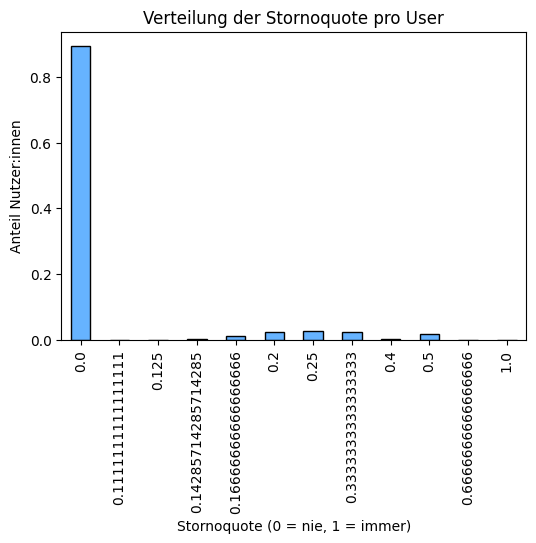

In [ ]:
# Features für Stornierungen nochmal berechnen und speichern
df_cancels = df.groupby("user_id").agg(
    total_trips=("trip_id", "count"),
    canceled_trips=("cancellation", "sum")
).reset_index()

df_cancels["cancel_ratio"] = df_cancels["canceled_trips"] / df_cancels["total_trips"]

# Verteilung der Stornoquote
cancel_stats = df_cancels["cancel_ratio"].value_counts(normalize=True).sort_index()

print("Verteilung der Stornoquote (Anteil Nutzer:innen):")
print(cancel_stats)

# Optional: Balkendiagramm
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
cancel_stats.plot(kind='bar', color='#66b3ff', edgecolor='black')
plt.title("Verteilung der Stornoquote pro User")
plt.xlabel("Stornoquote (0 = nie, 1 = immer)")
plt.ylabel("Anteil Nutzer:innen")
plt.show()

Um das Stornoverhalten besser zu verstehen, habe ich für jede:n Nutzer:in die Anzahl der gebuchten und die Anzahl der stornierten Trips gezählt. Daraus habe ich eine Stornoquote berechnet (canceled_trips / total_trips).
Die Auswertung zeigt, dass fast 90 % der Nutzer:innen nie stornieren, während ein kleiner Anteil von ca. 2–3 % gelegentlich storniert und nur ein sehr kleiner Bruchteil regelmäßig oder sogar immer storniert.

👉 Dieses Feature ist spannend, weil es Hinweise auf Kundengruppen mit stabilen vs. unsicheren Buchungen gibt. Für stabile Kund:innen wären Perks wie exklusive Rabatte sinnvoll, während für eher unsichere Kund:innen kostenlose Stornierungen attraktiver sein könnten.

## 🏨 7. Feature: Hotelbuchungsverhalten

Verteilung der Hotelbuchungsquote (Anteil Nutzer:innen):
hotel_ratio
0.000000    0.016059
0.250000    0.000902
0.333333    0.010826
0.400000    0.000902
0.500000    0.062793
0.600000    0.009022
0.666667    0.064598
0.714286    0.001263
0.750000    0.059906
0.800000    0.034464
0.833333    0.015879
0.857143    0.002346
0.875000    0.000722
1.000000    0.720318
Name: proportion, dtype: float64


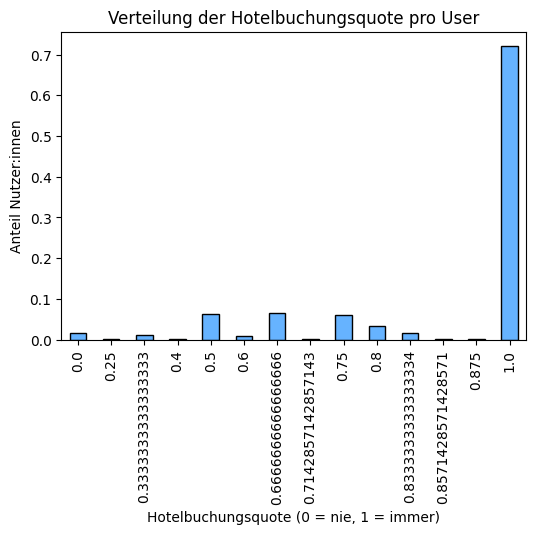

In [ ]:
# Features zu Hotelbuchungen pro Nutzer:in berechnen
df_hotels = df.groupby("user_id").agg(
    total_trips=("trip_id", "count"),
    hotel_bookings=("hotel_booked", "sum")
).reset_index()

df_hotels["hotel_ratio"] = df_hotels["hotel_bookings"] / df_hotels["total_trips"]

# Verteilung der Hotelbuchungsquote
hotel_stats = df_hotels["hotel_ratio"].value_counts(normalize=True).sort_index()

print("Verteilung der Hotelbuchungsquote (Anteil Nutzer:innen):")
print(hotel_stats)

# Visualisierung
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
hotel_stats.plot(kind='bar', color='#66b3ff', edgecolor='black')
plt.title("Verteilung der Hotelbuchungsquote pro User")
plt.xlabel("Hotelbuchungsquote (0 = nie, 1 = immer)")
plt.ylabel("Anteil Nutzer:innen")
plt.show()

Ich habe untersucht, wie stark Nutzer:innen bei ihren Trips Hotels über TravelTide gebucht haben. Dafür wurde die Hotelbuchungsquote berechnet (Anteil der Trips, bei denen auch ein Hotel gebucht wurde).
Die Ergebnisse zeigen, dass es zwei Hauptgruppen gibt:

* Nutzer:innen, die nie Hotels buchen (z. B. weil sie Freunde/Familie besuchen oder Geschäftsreisen mit vorab gebuchten Hotels machen).

* Nutzer:innen, die immer Hotels buchen und stark auf TravelTide angewiesen sind.

👉 Dieses Feature ist nützlich, weil es Perks wie „1 Nacht kostenlos im Hotel mit Flug“ oder „kostenloses Hotelessen“ besonders für Viel-Hotelbucher:innen attraktiv macht. Für andere Kund:innen wäre ein solcher Perk dagegen kaum relevant.

## ✈️🏨 8. Feature: Kombiniertes Buchungsverhalten (Flug & Hotel)

Kombiniertes Buchungsverhalten (Anteil Nutzer:innen):
booking_type
Flug + Hotel    0.850617
Nur Browsing    0.076025
Nur Hotels      0.058520
Nur Flüge       0.014838
Name: proportion, dtype: float64


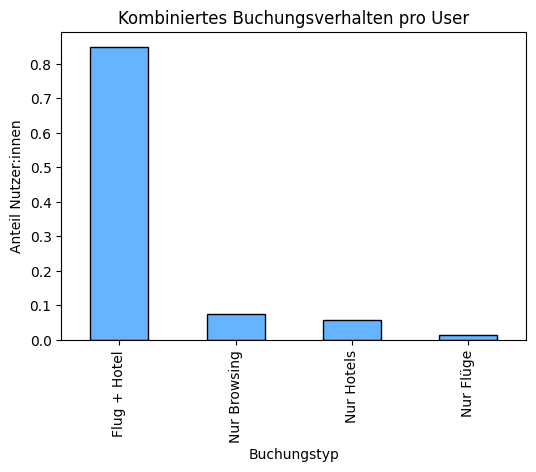

In [ ]:
# Kombiniertes Buchungsverhalten pro Nutzer:in berechnen
df_combo = df.groupby("user_id").agg(
    total_trips=("trip_id", "count"),
    flight_bookings=("flight_booked", "sum"),
    hotel_bookings=("hotel_booked", "sum")
).reset_index()

# Kategorien bilden
def booking_type(row):
    if row["flight_bookings"] == 0 and row["hotel_bookings"] == 0:
        return "Nur Browsing"
    elif row["flight_bookings"] > 0 and row["hotel_bookings"] == 0:
        return "Nur Flüge"
    elif row["flight_bookings"] == 0 and row["hotel_bookings"] > 0:
        return "Nur Hotels"
    else:
        return "Flug + Hotel"

df_combo["booking_type"] = df_combo.apply(booking_type, axis=1)

# Verteilung anschauen
combo_stats = df_combo["booking_type"].value_counts(normalize=True)

print("Kombiniertes Buchungsverhalten (Anteil Nutzer:innen):")
print(combo_stats)

# Visualisierung
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
combo_stats.plot(kind="bar", color="#66b3ff", edgecolor="black")
plt.title("Kombiniertes Buchungsverhalten pro User")
plt.xlabel("Buchungstyp")
plt.ylabel("Anteil Nutzer:innen")
plt.show()

Ich habe untersucht, welche Arten von Buchungen Nutzer:innen bei TravelTide bevorzugen. Dafür wurde ein kombiniertes Feature erstellt, das zwischen „Nur Flüge“, „Nur Hotels“, „Flug + Hotel“ und „Nur Browsing“ unterscheidet.

Die Ergebnisse verdeutlichen:

* Ein großer Teil der Nutzer:innen bleibt beim Browsing, ohne eine Buchung abzuschließen.

* Unter den Buchenden gibt es sowohl reine Flugkund:innen als auch reine Hotelkund:innen.

* Besonders interessant sind die Kund:innen, die regelmäßig Flug + Hotel kombinieren – sie haben den höchsten Wert für das Unternehmen, da sie mehrere Services gleichzeitig nutzen.

👉 Dieses Feature ist entscheidend, weil wir gezielt Perks entwickeln können:

* Für „Nur Flug“-Kund:innen machen kostenlose Checked Bags oder exklusive Flugrabatte Sinn.

* Für „Flug + Hotel“-Kund:innen sind Kombi-Perks wie „1 Nacht kostenlos im Hotel mit Flug“ besonders attraktiv.

## 💸 9. Feature: Preis-Sensibilität (Rabatte)

Inkonsistente Nutzerzeilen (sollte 0 sein): 0

Übersicht Rabatt-Sensibilität:
count    5998.000000
mean        0.157451
std         0.199357
min         0.000000
25%         0.000000
50%         0.100000
75%         0.250000
max         1.000000
Name: overall_discount_ratio, dtype: float64


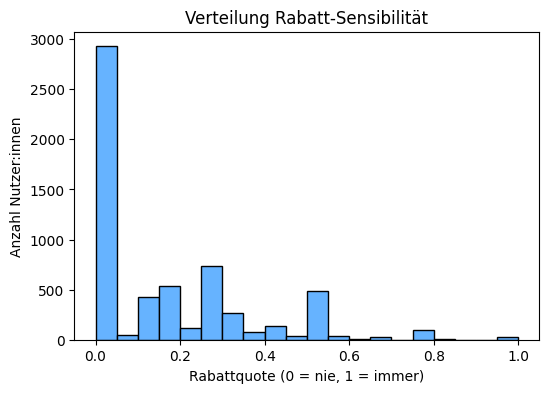

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Robuste Aggregation: nur gebuchte Flüge/Hotels zählen ------------------
df_discounts = (
    df.assign(
        flight_discounted_and_booked = df["flight_discount"] & df["flight_booked"],
        hotel_discounted_and_booked  = df["hotel_discount"]  & df["hotel_booked"],
    )
    .groupby("user_id")
    .agg(
        total_flights        = ("flight_booked", "sum"),
        discounted_flights   = ("flight_discounted_and_booked", "sum"),
        avg_flight_discount  = ("flight_discount_amount", "mean"),
        total_hotels         = ("hotel_booked", "sum"),
        discounted_hotels    = ("hotel_discounted_and_booked", "sum"),
        avg_hotel_discount   = ("hotel_discount_amount", "mean"),
    )
    .reset_index()
)

# --- Anteile (0..1) berechnen; Division durch 0 sicher behandeln -------------
def safe_ratio(num, den):
    out = num / den.replace(0, np.nan)
    return out.fillna(0.0)

df_discounts["flight_discount_ratio"] = safe_ratio(
    df_discounts["discounted_flights"], df_discounts["total_flights"]
)
df_discounts["hotel_discount_ratio"] = safe_ratio(
    df_discounts["discounted_hotels"], df_discounts["total_hotels"]
)

# Gesamtmaß als Mittel beider Raten
df_discounts["overall_discount_ratio"] = (
    df_discounts["flight_discount_ratio"] + df_discounts["hotel_discount_ratio"]
) / 2

# Aufräumen: evtl. verbleibende inf/NaN -> 0, und auf [0,1] clippen
df_discounts.replace([np.inf, -np.inf], np.nan, inplace=True)
df_discounts["overall_discount_ratio"] = (
    df_discounts["overall_discount_ratio"].fillna(0.0).clip(0, 1)
)

# Plausibilitätscheck (sollte 0 sein)
bad_rows = (df_discounts["discounted_flights"] > df_discounts["total_flights"]).sum() \
         + (df_discounts["discounted_hotels"]  > df_discounts["total_hotels"]).sum()
print(f"Inkonsistente Nutzerzeilen (sollte 0 sein): {bad_rows}")

# Überblick
print("\nÜbersicht Rabatt-Sensibilität:")
print(df_discounts["overall_discount_ratio"].describe())

# Histogramm
plt.figure(figsize=(6,4))
plt.hist(df_discounts["overall_discount_ratio"], bins=20, color="#66b3ff", edgecolor="black")
plt.title("Verteilung Rabatt-Sensibilität")
plt.xlabel("Rabattquote (0 = nie, 1 = immer)")
plt.ylabel("Anzahl Nutzer:innen")
plt.show()

Um Preis-Sensibilität sauber zu messen, habe ich nur tatsächlich gebuchte Flüge/Hotels betrachtet und gezählt, wie oft diese mit Rabatt gebucht wurden. Daraus berechne ich je Nutzer:in zwei Quoten (Flug/Hotel) und kombiniere sie zu einer allgemeinen „overall_discount_ratio“. Damit verhindere ich Fehlschlüsse durch Sessions mit Rabatt-Anzeige ohne Kauf (Division durch 0).
Die Verteilung zeigt: die Mehrheit bucht selten mit Rabatt, eine kleinere Gruppe bucht sehr häufig rabattiert – ideales Ziel für Perks wie „exklusive Discounts“ oder „1 Nacht gratis beim Flug“.

## 🛠️ 10. Reiseaktivität – Trips pro Monat

In [ ]:
# Nur nicht stornierte Trips betrachten
df_nc = df[df["cancellation"] == False].copy()

# departure_time in datetime umwandeln
df_nc["departure_time"] = pd.to_datetime(df_nc["departure_time"], errors="coerce")

# Trips pro Nutzer aggregieren
activity_features = df_nc.groupby("user_id").agg(
    total_trips=("trip_id", "nunique"),
    first_trip=("departure_time", "min"),
    last_trip=("departure_time", "max")
).reset_index()

# Beobachtungszeitraum in Monaten berechnen
activity_features["months_active"] = (
    (activity_features["last_trip"] - activity_features["first_trip"]).dt.days / 30
).fillna(0)

# Trips pro Monat berechnen
activity_features["trips_per_month"] = activity_features.apply(
    lambda row: row["total_trips"] / row["months_active"] if row["months_active"] > 0 else row["total_trips"],
    axis=1
)

# Überblick
print("Übersicht Trips pro Monat:")
print(activity_features[["user_id", "total_trips", "months_active", "trips_per_month"]].head())

Übersicht Trips pro Monat:
   user_id  total_trips  months_active  trips_per_month
0    23557            2       0.000000         2.000000
1    94883            2       0.666667         3.000000
2   101486            2       0.000000         2.000000
3   101961            5       4.633333         1.079137
4   106907            1       0.000000         1.000000


## 📊 11. Travel Frequency – Trips pro Monat

   user_id  total_trips  active_months  trips_per_month
0    23557            0       6.241787         0.000000
1    94883            2       4.533509         0.441159
2   101486            1       5.847569         0.171011
3   101961            5       5.059133         0.988312
4   106907            1       6.471748         0.154518
5   118043            3       5.223390         0.574340
6   120851            1       5.190539         0.192658
7   125845            3       6.307490         0.475625
8   133058            1       6.241787         0.160211
9   149058            5       5.453351         0.916867

Trips/Monat – Kurzbeschreibung:
count    5998.000000
mean        0.504614
std         0.344730
min         0.000000
25%         0.235969
50%         0.490968
75%         0.720473
max         2.254815
Name: trips_per_month, dtype: float64


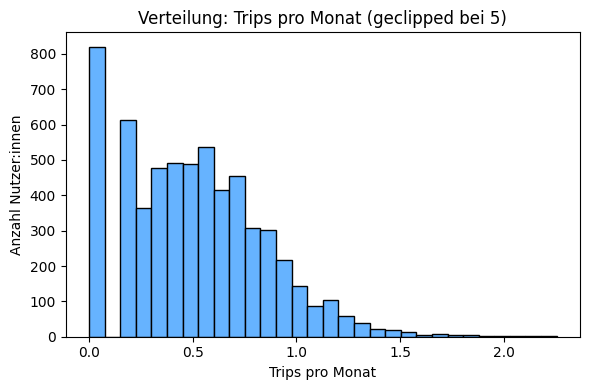

In [ ]:
# --- Trips pro Monat (user level) ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Nur echte (nicht stornierte) Trips zählen
trip_mask = (
    df["trip_id"].notna()
    & df["departure_time"].notna()
    & (df["cancellation"] == False)
)

df_trips = df.loc[trip_mask, ["user_id", "trip_id", "departure_time"]].copy()

# zur Sicherheit: pro Trip nur einmal zählen
df_trips = df_trips.drop_duplicates(subset=["user_id", "trip_id"])

# 2) Total Trips pro User
user_trips = (
    df_trips.groupby("user_id", as_index=False)
    .agg(total_trips=("trip_id", "nunique"))
)

# 3) Aktivitätsfenster des Users (in Monaten) auf Basis der Sessions
user_activity = (
    df.groupby("user_id")
      .agg(first_session=("session_start", "min"),
           last_session =("session_start", "max"))
      .reset_index()
)
# Monate als gleitendes Maß (≈ 30.44 Tage); min. 1 Monat, damit wir nicht durch 0 teilen
months = (user_activity["last_session"] - user_activity["first_session"]).dt.days / 30.44
user_activity["active_months"] = np.clip(months, 1, None)

# 4) Trips/Monat berechnen
freq = user_activity.merge(user_trips, on="user_id", how="left")
freq["total_trips"]   = freq["total_trips"].fillna(0).astype(int)
freq["trips_per_month"] = freq["total_trips"] / freq["active_months"]

# 5) Aufräumen & kurze Sicht
freq = freq[["user_id", "total_trips", "active_months", "trips_per_month"]]
print(freq.head(10))

# 6) (Optional) Verteilung als Histogramm – für schnelle Einordnung
vals = freq["trips_per_month"].clip(upper=5)  # Plot lesbarer machen, Werte >5 abschneiden
print("\nTrips/Monat – Kurzbeschreibung:")
print(freq["trips_per_month"].describe())

plt.figure(figsize=(6,4))
plt.hist(vals, bins=30, color="#66b3ff", edgecolor="black")
plt.title("Verteilung: Trips pro Monat (geclipped bei 5)")
plt.xlabel("Trips pro Monat")
plt.ylabel("Anzahl Nutzer:innen")
plt.tight_layout()
plt.show()

# 7) Für spätere Schritte als Feature-Tabelle vormerken
user_freq_features = freq.rename(columns={
    "total_trips": "u_total_trips",
    "active_months": "u_active_months",
    "trips_per_month": "u_trips_per_month"
})

Travel Frequency – Trips pro Monat (User-Level)
Ich messe, wie häufig jemand tatsächlich reist, indem ich pro Nutzer:in alle nicht stornierten Trips zähle und durch die aktive Nutzungszeit in Monaten teile. Das Aktivitätsfenster bestimme ich über die erste und letzte Session. So gleiche ich Fairness-Unterschiede aus (jemand mit nur 1 Monat Historie wird nicht künstlich benachteiligt).
Ergebnis sind drei Features:

* u_total_trips (Anzahl abgeschlossener Trips),

* u_active_months (aktive Monate auf der Plattform),

* u_trips_per_month (Frequenzmaß für Segmentierung).

Das Histogramm zeigt die Verteilung und bestätigt, dass die meisten Nutzer:innen selten reisen, während wenige Vielreisende deutlich höhere Werte haben. Dieses Feature hilft später, Vielreisende von Gelegenheitstraveller:innen zu unterscheiden und Perks wie „1 Free Night“ oder „No Cancellation Fee“ gezielter zuzuordnen.
Für das Plot habe ich Werte > 5 geclippt, damit die Verteilung lesbarer bleibt – die Rohwerte bleiben natürlich erhalten.

## 💸 12. Feature: Wert der Reisen (Customer Value Light)

In [ ]:
# Kopie des Datensatzes
df_value = df.copy()

# Relevante Spalten in numerische Werte umwandeln (Fehlerhafte Einträge -> NaN)
df_value["base_fare_usd"] = pd.to_numeric(df_value["base_fare_usd"], errors="coerce")
df_value["hotel_price_per_room_night_usd"] = pd.to_numeric(df_value["hotel_price_per_room_night_usd"], errors="coerce")

# Ø Flugpreis & Ø Hotelpreis pro Nacht pro Kunde berechnen
value_features = df_value.groupby("user_id").agg(
    avg_flight_price=("base_fare_usd", "mean"),
    avg_hotel_price_per_night=("hotel_price_per_room_night_usd", "mean")
).reset_index()

# Gesamtwert der Reisen als einfacher Mittelwert
value_features["travel_value"] = value_features[["avg_flight_price", "avg_hotel_price_per_night"]].mean(axis=1)

value_features.head()

,user_id,avg_flight_price,avg_hotel_price_per_night,travel_value
0,23557,NaN,177.0,177.0000
1,94883,432.045,90.0,261.0225
2,101486,189.910,198.5,194.2050
3,101961,248.532,136.0,192.2660
4,106907,13902.060,129.0,7015.5300


Um einen ersten Überblick über den Wert der Reisen pro Kunde zu bekommen, haben wir Durchschnittswerte für Flug- und Hotelpreise berechnet. Dafür wurden die Spalten base_fare_usd (Flugpreise) und hotel_price_per_room_night_usd (Hotelpreise pro Nacht) genutzt.

* avg_flight_price: Ø Flugpreis pro Kunde

* avg_hotel_price_per_night: Ø Hotelpreis pro Nacht pro Kunde

* travel_value: kombinierter Wert aus beiden Kategorien

👉 Diese Metrik gibt uns eine erste Annäherung an den Monetary Value (Teil des bekannten RFM-Ansatzes: Recency, Frequency, Monetary). Sie zeigt, welche Kunden eher günstige vs. teure Reisen buchen.

## 📅 13. Feature: Saisonales Reiseverhalten

In [ ]:
# Sicherstellen, dass departure_time Datetime ist
df["departure_time"] = pd.to_datetime(df["departure_time"], errors="coerce")

# Monat und Quartal extrahieren
df["departure_month"] = df["departure_time"].dt.month
df["departure_quarter"] = df["departure_time"].dt.quarter

# Aggregation pro User: häufigster Monat + Quartal
season_features = df.groupby("user_id").agg(
    most_common_month=("departure_month", lambda x: x.mode()[0] if not x.mode().empty else None),
    most_common_quarter=("departure_quarter", lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()

print(season_features.head())

   user_id  most_common_month  most_common_quarter
0    23557                NaN                  NaN
1    94883                3.0                  1.0
2   101486                6.0                  2.0
3   101961                3.0                  1.0
4   106907                1.0                  1.0


## 💼 14. Feature: Business vs. Leisure Reisen

In [ ]:
# Business vs. Leisure Trips bestimmen
import numpy as np

# Departure & Return in datetime (falls noch nicht)
df['departure_time'] = pd.to_datetime(df['departure_time'], errors='coerce')
df['return_time'] = pd.to_datetime(df['return_time'], errors='coerce')

# Trip-Dauer in Tagen
df['trip_duration_days'] = (df['return_time'] - df['departure_time']).dt.days

# Business-Trip Definition: Start Mo-Do & <= 4 Tage Dauer
df['is_business_trip'] = (
    (df['departure_time'].dt.weekday < 4) &  # Mo=0, So=6
    (df['trip_duration_days'] <= 4)
)

# Anteil Business-Trips pro User
business_features = df.groupby('user_id')['is_business_trip'].mean().reset_index()
business_features.rename(columns={'is_business_trip': 'business_trip_share'}, inplace=True)

business_features.head()

,user_id,business_trip_share
0,23557,0.000
1,94883,0.125
2,101486,0.000
3,101961,0.000
4,106907,0.000


Um das Reiseverhalten meiner Kund:innen besser zu verstehen, habe ich untersucht, wie stark sie zu Business-Trips neigen. Dabei habe ich eine einfache Definition verwendet:

* Business-Trip = Reise startet zwischen Montag und Donnerstag und dauert maximal 4 Tage.

* Alles andere habe ich als Leisure-Trip (Freizeit) klassifiziert.

Anschließend habe ich für jede:n User:in den Anteil der Business-Trips berechnet. Daraus entsteht die Metrik business_trip_share, die Werte zwischen 0 (kein Business-Verhalten) und 1 (nur Business-Trips) annehmen kann.

Dieses Feature ist nützlich, um typische Geschäftsreisende von Freizeit- oder Urlaubsreisenden zu unterscheiden. Es hilft mir, spätere Segmente besser einzuordnen und die passenden Perks (z. B. Flexibilität vs. Freizeitangebote) zuzuweisen.

## 🧩 15. User Base zusammenführen (alle Features auf User-Level)

In [ ]:
import pandas as pd
import numpy as np

# 1) Basis: alle Nutzer einmalig
user_base = df[["user_id"]].drop_duplicates().reset_index(drop=True)

# 2) Hilfsfunktion fürs saubere Mergen
def mmerge(left, right, on="user_id"):
    return left.merge(right, on=on, how="left")

# 3) Relevante Feature-Frames auswählen / aufräumen
# Rabatt-Sensibilität (robust berechnet)
disc_cols = [
    "user_id",
    "flight_discount_ratio", "hotel_discount_ratio", "overall_discount_ratio",
    "avg_flight_discount", "avg_hotel_discount"
]
df_discounts_sel = df_discounts[disc_cols].copy()

# Storno-Feature
df_cancels_sel = df_cancels[["user_id", "cancel_ratio"]].copy()

# Hotelbuchungsquote
df_hotels_sel = df_hotels[["user_id", "hotel_ratio"]].copy()

# Kombiniertes Buchungsverhalten
df_combo_sel = df_combo[["user_id", "booking_type"]].copy()

# Travel Frequency
freq_sel = user_freq_features[["user_id", "u_total_trips", "u_active_months", "u_trips_per_month"]].copy()

# Value / Warenkorb
value_sel = value_features[["user_id", "avg_flight_price", "avg_hotel_price_per_night", "travel_value"]].copy()

# Saisonales Verhalten (Monat)
season_sel = season_features[["user_id", "most_common_month"]].copy()

# Business vs Leisure
business_sel = business_features[["user_id", "business_trip_share"]].copy()

# 4) Alles zusammenführen
user_base = (
    user_base.pipe(mmerge, df_discounts_sel)
             .pipe(mmerge, df_cancels_sel)
             .pipe(mmerge, df_hotels_sel)
             .pipe(mmerge, df_combo_sel)
             .pipe(mmerge, freq_sel)
             .pipe(mmerge, value_sel)
             .pipe(mmerge, season_sel)
             .pipe(mmerge, business_sel)
)

# 5) Aufräumen: sinnvolle Defaults
#   - Kategorische Lücken in booking_type -> "Nur Browsing"
user_base["booking_type"] = user_base["booking_type"].fillna("Nur Browsing")

#   - Numerische NaNs -> 0 (heißt: bisher kein Signal/keine Buchung)
num_cols = user_base.select_dtypes(include=[np.number]).columns
user_base[num_cols] = user_base[num_cols].fillna(0)

# 6) Kurzer Überblick
print("User Base Shape:", user_base.shape)
print("\nSpalten (User Base):", user_base.columns.tolist())
display(user_base.head(10))

# 7) Export für Week 3 (Segmentation)
EXPORT_PATH = "user_base_week2.csv"
user_base.to_csv(EXPORT_PATH, index=False)
print(f"\nExport ok: {EXPORT_PATH}")

User Base Shape: (5998, 17)

Spalten (User Base): ['user_id', 'flight_discount_ratio', 'hotel_discount_ratio', 'overall_discount_ratio', 'avg_flight_discount', 'avg_hotel_discount', 'cancel_ratio', 'hotel_ratio', 'booking_type', 'u_total_trips', 'u_active_months', 'u_trips_per_month', 'avg_flight_price', 'avg_hotel_price_per_night', 'travel_value', 'most_common_month', 'business_trip_share']


,user_id,flight_discount_ratio,hotel_discount_ratio,overall_discount_ratio,avg_flight_discount,avg_hotel_discount,cancel_ratio,hotel_ratio,booking_type,u_total_trips,u_active_months,u_trips_per_month,avg_flight_price,avg_hotel_price_per_night,travel_value,most_common_month,business_trip_share
0,505172,0.666667,0.333333,0.500,0.100,0.225,0.333333,1.0,Flug + Hotel,2,4.237845,0.471938,4750.4400,144.000000,2447.220000,10.0,0.000000
1,513237,0.000000,0.000000,0.000,0.050,0.150,0.000000,1.0,Flug + Hotel,1,2.858081,0.349885,588.8000,179.500000,384.150000,3.0,0.125000
2,513397,0.000000,0.250000,0.125,0.000,0.050,0.000000,0.8,Flug + Hotel,4,4.796321,0.833973,362.6825,153.500000,258.091250,1.0,0.250000
3,514053,1.000000,0.500000,0.750,0.125,0.100,0.000000,1.0,Flug + Hotel,1,4.927727,0.202933,339.6600,168.000000,253.830000,1.0,0.000000
4,531971,0.000000,0.000000,0.000,0.000,0.000,0.000000,1.0,Flug + Hotel,2,3.580815,0.558532,381.3100,76.000000,228.655000,2.0,0.000000
5,535595,0.000000,0.000000,0.000,0.050,0.100,0.000000,0.5,Flug + Hotel,2,1.971091,1.014667,5779.4950,326.000000,3052.747500,3.0,0.000000
6,537688,0.000000,0.000000,0.000,0.150,0.000,0.000000,1.0,Flug + Hotel,1,4.237845,0.235969,361.4900,197.000000,279.245000,3.0,0.000000
7,538270,0.000000,0.000000,0.000,0.000,0.100,0.000000,1.0,Flug + Hotel,2,4.730618,0.422778,222.4200,144.500000,183.460000,1.0,0.222222
8,541672,0.000000,0.000000,0.000,0.150,0.100,0.000000,1.0,Flug + Hotel,4,4.533509,0.882319,571.8700,168.000000,369.935000,3.0,0.111111
9,542358,0.000000,0.000000,0.000,0.200,0.075,0.000000,1.0,Flug + Hotel,2,4.697766,0.425734,369.3950,216.333333,292.864167,1.0,0.000000



Export ok: user_base_week2.csv


Ich habe alle in Week 2 entwickelten Features auf User-Level zusammengeführt und als user_base_week2.csv exportiert.
Die Tabelle enthält pro Nutzer:in u. a. folgende Merkmale:

+ Preis-/Rabatt-Sensibilität: flight_discount_ratio, hotel_discount_ratio, overall_discount_ratio, avg_flight_discount, avg_hotel_discount

+ Stornoverhalten: cancel_ratio

+ Hotelpräferenz: hotel_ratio

+ Buchungstyp: booking_type (Nur Browsing / Nur Flüge / Nur Hotels / Flug + Hotel)

+ Reiseaktivität: u_total_trips, u_active_months, u_trips_per_month

+ Warenkorb/Wert: avg_flight_price, avg_hotel_price_per_night, travel_value

+ Saisonalität: most_common_month

+ Business-Anteil: business_trip_share

Fehlende Werte habe ich bewusst konservativ behandelt:

+ Numerische Features wurden mit 0 aufgefüllt (Interpretation: „bisher kein Signal / keine Buchung“).

+ booking_type setze ich bei Lücken auf „Nur Browsing“, da keine Buchung vorliegt.

Diese User Base ist die direkte Grundlage für die Segmentierung in Week 3. Sie ist schlank genug (fokussiert auf ~10 Kernmerkmale), um verständlich zu bleiben, und deckt gleichzeitig die relevanten Dimensionen für die Perk-Zuordnung ab (Preisfokus, Risiko/Storno, Aktivität, Hotel/Flug-Mix, Saison, Business vs. Leisure).